### Personal Project 2 - Stephan Pentchev
After accumulating and gathering the data from February to June 2024, we can begin analyzing the data and creating various visualizations to gain a better understanding of the spendings. Additionally, we have calculated the average exchange rates below to convert the relevant values into Hungarian Forints, Euros, and Canadian Dollars.

### Part 1 
Pre-processing the data by filling in missing values and adding necessary information.

In [11]:
import pandas as pd

df = pd.read_csv('statswinter24.csv')

#Based on this website we retried the average exchange rates
#https://www.ofx.com/en-ca/forex-news/historical-exchange-rates/monthly-average-rates/
#We'll calculate from February 2024 to June 2024

#HUF conversions
huftocad = (0.003755+0.003724+0.003736+0.003815+0.003739)/5
huftoeuro = (0.002577+0.002531+0.002546+0.002581+0.002534)/5

#LYRA conversions
liratohuf = (11.677164+11.357449+11.330795+11.102541+11.250972)/5
liratocad = (0.043844+0.042329+0.042334+0.042353+0.042069)/5
liratoeuro = (0.030098+0.028741+0.02885+0.02866+0.028512)/5

#Swedish krowns conversions
sektohuf = (34.445012+34.868758+33.850564+33.28332+34.934835)/5
sektocad = (0.129328+0.129874+0.126476+0.126968+0.130521)/5
sektoeuro = (0.088775+0.08824+0.086191+0.085918+0.088458)/5

#CAD conversions
cadtohuf = (266.335528+268.507357+267.654296+262.145369+267.46155)/5
cadtoeuro = (0.088775+0.08824+0.086191+0.085918+0.088458)/5

#EURO conversions
eurotohuf = (387.991625+395.159916+392.743986+387.383748+394.609098)/5
eurotocad = (1.456781+1.472198+1.46738+1.477772+1.475488)/5

#Put it in a dictionnary
conversion_rates= {
    'HUF_to_CAD': huftocad,
    'HUF_to_EUR': huftoeuro,
    'LYRA_to_HUF': liratohuf,
    'LYRA_to_CAD': liratocad,
    'LYRA_to_EUR': liratoeuro,
    'SEK_to_HUF': sektohuf,
    'SEK_to_CAD': sektocad,
    'SEK_to_EUR': sektoeuro,
    'CAD_to_HUF': cadtohuf,
    'CAD_to_EUR': cadtoeuro,
    'EUR_to_HUF': eurotohuf,
    'EUR_to_CAD': eurotocad
}

In [13]:
#Evaluate the type of values
df.dtypes

Spending            object
Type of Expense     object
Month               object
in HUF             float64
in CAD             float64
in EURO            float64
Country             object
dtype: object

In [15]:
#Current columns we have
df.columns

Index(['Spending', 'Type of Expense', 'Month', 'in HUF', 'in CAD', 'in EURO',
       'Country'],
      dtype='object')

In [17]:
df.head(30)

,Spending,Type of Expense,Month,in HUF,in CAD,in EURO,Country
0,"9,120.00 Ft",Restaurant,February,NaN,NaN,NaN,Hungary
1,"12,701.00 Ft",Restaurant,February,NaN,NaN,NaN,Hungary
2,"1,530.00 Ft",Restaurant,February,NaN,NaN,NaN,Hungary
3,"2,680.00 Ft",Restaurant,February,NaN,NaN,NaN,Hungary
4,"5,036.00 Ft",Bar,February,NaN,NaN,NaN,Hungary
5,"9,990.00 Ft",Restaurant,February,NaN,NaN,NaN,Hungary
6,"2,000.00 Ft",Telephone,February,NaN,NaN,NaN,Hungary
7,"2,158.00 Ft",Grocery,February,NaN,NaN,NaN,Hungary
8,"1,449.00 Ft",Grocery,February,NaN,NaN,NaN,Hungary
9,"2,697.00 Ft",Grocery,February,NaN,NaN,NaN,Hungary


## Function created to fill in the Missing Values

In [19]:
def fill_currency_columns(row):
    spending = row['Spending'].strip().lower().replace(',','')
    #extract the ammount to the numeric value to string
    amount_str = ''.join([c for c in spending if c.isdigit() or c == '.'])
    amount = float(amount_str) if amount_str else 0.0
    #We'll fill the column name now
    #for huf
    if 'ft' in spending:
        row['in HUF'] = amount
        #convert now with our converters
        row['in CAD'] = amount * conversion_rates['HUF_to_CAD'] if pd.isna(row['in CAD']) else row['in CAD']
        row['in EURO'] = amount * conversion_rates['HUF_to_EUR'] if pd.isna(row['in EURO']) else row['in EURO']
    #for cad
    elif '$' in spending:
        # Fill 'in CAD' column (if NaN)
        row['in CAD'] = amount
        #convert and fill in HUF and EURO
        row['in HUF'] = amount * conversion_rates['CAD_to_HUF'] if pd.isna(row['in HUF']) else row['in HUF']
        row['in EURO'] = amount * conversion_rates['CAD_to_EUR'] if pd.isna(row['in EURO']) else row['in EURO']
    #for euros
    elif '€' in spending:
        # Fill 'in EURO' column (if NaN)
        row['in EURO'] = amount
        #convert and fill in HUF and CAD
        row['in HUF'] = amount * conversion_rates['EUR_to_HUF'] if pd.isna(row['in HUF']) else row['in HUF']
        row['in CAD'] = amount * conversion_rates['EUR_to_CAD'] if pd.isna(row['in CAD']) else row['in CAD']
    #for turkish lira
    elif '₺' in spending:
        row['in HUF'] = amount * conversion_rates['LYRA_to_HUF'] if pd.isna(row['in HUF']) else row['in HUF']
        row['in CAD'] = amount * conversion_rates['LYRA_to_CAD'] if pd.isna(row['in CAD']) else row['in CAD']
        row['in EURO'] = amount * conversion_rates['LYRA_to_EUR'] if pd.isna(row['in EURO']) else row['in EURO']
    #for swedish krowns
    elif 'kr' in spending:
        row['in HUF'] = amount * conversion_rates['SEK_to_HUF'] if pd.isna(row['in HUF']) else row['in HUF']
        row['in CAD'] = amount * conversion_rates['SEK_to_CAD'] if pd.isna(row['in CAD']) else row['in CAD']
        row['in EURO'] = amount * conversion_rates['SEK_to_EUR'] if pd.isna(row['in EURO']) else row['in EURO']
    
    return row

df1 = df.apply(fill_currency_columns, axis=1)

In [21]:
df1

,Spending,Type of Expense,Month,in HUF,in CAD,in EURO,Country
0,"9,120.00 Ft",Restaurant,February,9120.000000,34.234656,23.290656,Hungary
1,"12,701.00 Ft",Restaurant,February,12701.000000,47.677014,32.435814,Hungary
2,"1,530.00 Ft",Restaurant,February,1530.000000,5.743314,3.907314,Hungary
3,"2,680.00 Ft",Restaurant,February,2680.000000,10.060184,6.844184,Hungary
4,"5,036.00 Ft",Bar,February,5036.000000,18.904137,12.860937,Hungary
...,...,...,...,...,...,...,...
343,"3,000.00 Ft",Telephone,June,3000.000000,11.261400,7.661400,Portugal
344,"2,200.00 Ft",Transport,June,2200.000000,8.258360,5.618360,Portugal
345,€ 21.56,Transport,June,8442.414664,31.691557,21.560000,Portugal
346,€ 15.50,Restaurant,June,6069.453956,22.783819,15.500000,Portugal


### Ratings
The ratings scale used in this project ranges from 1 to 5, where each number represents a specific level of satisfaction or quality. This scale is used to evaluate the overall experience in the country.\
    `5 = Great`: This rating indicates the highest level of satisfaction or quality. It represents excellent performance, outcomes, or experience in the given category.\
    `4 = Good`: A score of 4 suggests a high level of satisfaction or quality, but with minor improvements or issues.\
    `3 = Average`: This score represents a neutral or acceptable level of quality. It indicates that the item or service meets the basic expectations but lacks notable distinction or excellence.\
    `2 = Fair`: A score of 2 suggests that the quality is below average. Some improvements are necessary to meet expectations.\
    `1 = Not Good`: This is the lowest rating, indicating poor quality or performance. A rating of 1 reflects significant shortcomings or dissatisfaction.

In [113]:
ratings = {
    'Hungary': 5,
    'Slovakia': 3.5,
    'Spain': 4,
    'Austria': 3,
    'Malta': 4,
    'Croatia': 5,
    'Bulgaria': 5,
    'Turkey': 5,
    'Sweden': 5,
    'Portugal': 5,
    'France':5
}

In [25]:
df1['Ratings'] = df1['Country'].map(ratings)

In [27]:
df1

,Spending,Type of Expense,Month,in HUF,in CAD,in EURO,Country,Ratings
0,"9,120.00 Ft",Restaurant,February,9120.000000,34.234656,23.290656,Hungary,5.0
1,"12,701.00 Ft",Restaurant,February,12701.000000,47.677014,32.435814,Hungary,5.0
2,"1,530.00 Ft",Restaurant,February,1530.000000,5.743314,3.907314,Hungary,5.0
3,"2,680.00 Ft",Restaurant,February,2680.000000,10.060184,6.844184,Hungary,5.0
4,"5,036.00 Ft",Bar,February,5036.000000,18.904137,12.860937,Hungary,5.0
...,...,...,...,...,...,...,...,...
343,"3,000.00 Ft",Telephone,June,3000.000000,11.261400,7.661400,Portugal,5.0
344,"2,200.00 Ft",Transport,June,2200.000000,8.258360,5.618360,Portugal,5.0
345,€ 21.56,Transport,June,8442.414664,31.691557,21.560000,Portugal,5.0
346,€ 15.50,Restaurant,June,6069.453956,22.783819,15.500000,Portugal,5.0


## Part 2 

### Now let's create the visualisations

In [29]:
import folium 
import seaborn as sns
import matplotlib.pyplot as plt 
import json
import pandas as pd
from folium import GeoJson

In [30]:
import pandas as pd

# Assuming df1 already contains the filled columns (in HUF, in CAD, in EURO) and Ratings

# Group by 'Country' and aggregate the sum of 'in HUF', 'in CAD', and 'in EURO'
country_summary = df1.groupby('Country').agg(
    Total_HUF=('in HUF', 'sum'),
    Total_CAD=('in CAD', 'sum'),
    Total_EURO=('in EURO', 'sum'),
    Rating=('Ratings', 'first')  # Use 'first' to get the rating for each country
).reset_index()

# Format the columns to show them as currency
country_summary['Total_HUF'] = country_summary['Total_HUF'].apply(lambda x: f"{x:,.2f} ft")
country_summary['Total_CAD'] = country_summary['Total_CAD'].apply(lambda x: f"{x:,.2f} $")
country_summary['Total_EURO'] = country_summary['Total_EURO'].apply(lambda x: f"€ {x:,.2f}")

# Display the new DataFrame
country_summary

,Country,Total_HUF,Total_CAD,Total_EURO,Rating
0,Austria,"126,745.89 ft",475.78 $,€ 323.68,3.0
1,Bulgaria,"117,448.95 ft",440.86 $,€ 168.18,5.0
2,Croatia,"321,396.58 ft","1,206.40 $",€ 381.46,5.0
3,France,"247,680.31 ft",929.75 $,€ 632.52,5.0
4,Hungary,"1,176,154.58 ft","4,414.95 $","€ 2,327.42",5.0
5,Malta,"206,763.95 ft",776.13 $,€ 338.24,4.0
6,Portugal,"114,289.47 ft",429.02 $,€ 291.87,5.0
7,Slovakia,"15,306.77 ft",57.46 $,€ 39.09,3.5
8,Spain,"48,066.16 ft",180.43 $,€ 122.75,4.0
9,Sweden,"95,012.32 ft",356.58 $,€ 242.60,5.0


## Interactive map of Europe
The interactive map displays all the different countries visited and the associated spending for each.
By using a GeoJSON file, we can draw borders around the countries of Europe, creating an interactive map that visually represents the data.\
    `GeoJSON`: This file format allows us to define geographical regions (countries, cities, etc.) with precise borders and properties. In this case, it is used to define the countries of Europe and display them on the map.\
    `Interactive Elements`: Users can interact with the map, hover over or click on individual countries to view the associated spending data. This makes it easier to visually compare the spendings across different countries in Europe.
    
This approach combines geographical data with financial information, providing a clear and engaging way to analyze the data in a spatial context.

In [33]:
geojson_file = 'europe.geojson'

with open(geojson_file, 'r') as f:
    geojson_data = json.load(f)

In [439]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import json

# Load your GeoJSON data for Europe
geojson_file = 'europe.geojson'  #Replace with your local path
with open(geojson_file, 'r') as f:
    geojson_data = json.load(f)

# Create a Plotly choropleth map
fig = px.choropleth(country_summary,
                    locations='Country',
                    locationmode='country names',
                    color='Country',  # You can also use 'total_huf' or 'total_euro'
                    hover_name='Country',
                    hover_data=["Total_HUF", "Total_CAD", "Total_EURO", "Rating"],
                    geojson=geojson_data,
                    color_continuous_scale='Viridis')

#Update layout to ensure the map has the right properties
fig.update_geos(fitbounds="locations", visible=True)

fig.update_layout(
    title_text="Country Spendings in CAD, HUF, and EURO with Ratings",
    title_x=0.5,
    geo=dict(
        projection_type="mercator",
    ),
    width=1000,  #Adjust the width of the map
    height=1000,  #Adjust the height of the map
)
fig.write_html("europespending2024.html")

# Create a Dash app to display the map
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Map of Country Spendings from Februrary to June 2024", style={'text-align': 'center'}),
    dcc.Graph(id='map', figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)

### 'Timeplot' of our spendings from February to June 2024

C:\Users\steve\AppData\Local\Temp\ipykernel_40992\1084412177.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df1.groupby(['Month', 'Type of Expense'])[['in HUF', 'in CAD', 'in EURO']].sum().reset_index()


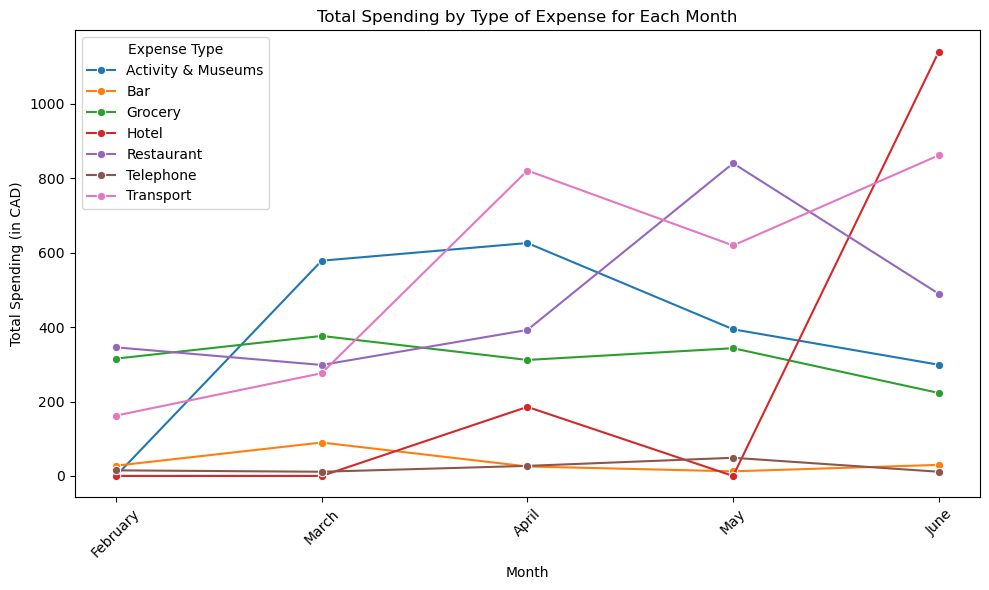

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create the specific order all while processing Month in a categorial value
df1['Month'] = pd.Categorical(df1['Month'], categories=['February', 'March', 'April', 'May', 'June'], ordered=True)

#Group by 'Month' and 'Type of Expense' to calculate the total sum of spending for each category
df_grouped = df1.groupby(['Month', 'Type of Expense'])[['in HUF', 'in CAD', 'in EURO']].sum().reset_index()

#With Seaborn, we'll create our lineplot and see the timeline of the spendings
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Month', y='in CAD', hue='Type of Expense', marker='o')

#Customization of our lineplot with pyplot
plt.title('Total Spending by Type of Expense for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Spending (in CAD)')

#Display the plot 
plt.xticks(rotation=45)
plt.legend(title='Expense Type')
plt.tight_layout()
plt.show()

### The dataframe of the plot 

In [37]:
df_grouped

,Month,Type of Expense,in HUF,in CAD,in EURO
0,February,Activity & Museums,0.000000,0.000000,0.000000
1,February,Bar,7346.308280,27.576687,18.760937
2,February,Grocery,83991.481157,315.287592,214.497235
3,February,Hotel,0.000000,0.000000,0.000000
4,February,Restaurant,92079.643355,345.649192,235.152638
5,February,Telephone,4000.000000,15.015200,10.215200
6,February,Transport,43206.498066,162.190601,110.339594
7,March,Activity & Museums,154109.565758,578.499435,393.563339
8,March,Bar,23926.000000,89.813419,61.102219
9,March,Grocery,100250.387648,376.322032,256.018234


### For easier readability of the dataframe

In [49]:
df2 = df_grouped.groupby(['Month','Type of Expense']).sum()
df2

C:\Users\steve\AppData\Local\Temp\ipykernel_40992\3639439892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df_grouped.groupby(['Month','Type of Expense']).sum()


in HUF       in CAD     in EURO
Month    Type of Expense                                           
February Activity & Museums       0.000000     0.000000    0.000000
         Bar                   7346.308280    27.576687   18.760937
         Grocery              83991.481157   315.287592  214.497235
         Hotel                    0.000000     0.000000    0.000000
         Restaurant           92079.643355   345.649192  235.152638
         Telephone             4000.000000    15.015200   10.215200
         Transport            43206.498066   162.190601  110.339594
March    Activity & Museums  154109.565758   578.499435  393.563339
         Bar                  23926.000000    89.813419   61.102219
         Grocery             100250.387648   376.322032  256.018234
         Hotel                    0.000000     0.000000    0.000000
         Restaurant           79452.358629   298.250836  202.903976
         Telephone             3000.000000    11.261400    7.661400
         Transport            73534.073128   276.033504  187.790579
April    Activity & Museums  166770.781503   625.970843   73.734742
         Bar                   6775.000000    25.431995   17.301995
         Grocery              83052.988508   311.764969  212.100348
         Hotel                49439.711567   185.570000   16.240418
         Restaurant          104518.553879   392.343747  266.918350
         Telephone             7200.000000    27.027360   18.387360
         Transport           218677.002074   820.838414  340.873302
May      Activity & Museums  105003.153474   394.128945  268.137365
         Bar                   3300.000000    12.387540    8.427540
         Grocery              91460.216065   343.313540  233.565142
         Hotel                    0.000000     0.000000    0.000000
         Restaurant          223868.942376   840.324272  571.696135
         Telephone            13000.000000    48.799400   33.199400
         Transport           165013.723543   619.420085  340.305319
June     Activity & Museums   79608.874099   298.846078  203.309500
         Bar                   7928.000000    29.760126   20.246526
         Grocery              59394.091683   222.958893  151.682670
         Hotel               303887.579917  1140.630000   99.823831
         Restaurant          130372.858596   489.409587  332.954454
         Telephone             3000.000000    11.261400    7.661400
         Transport           229613.001686   861.919401  522.388234

## Other graphics looking on the percentages and total sums in CAD 
#### Type of expenses and Country
In addition to the interactive map, we also generated other dataframes to analyze the data further, focusing on the percentages and total sums of expenses in CAD

In [91]:
df3 = df1.groupby(['Country'])[['in CAD']].sum().sort_values(by=['in CAD'], ascending=False)
df3

,in CAD
Country,
Hungary,4414.945865
Croatia,1206.396426
Turkey,930.646076
France,929.752076
Malta,776.125715
Austria,475.784164
Bulgaria,440.862241
Portugal,429.023557
Sweden,356.577906


In [47]:
df4 = df1.groupby(['Type of Expense'])[['in CAD']].sum().sort_values(by=['in CAD'], ascending=False)
df4

,in CAD
Type of Expense,
Transport,2740.402005
Restaurant,2365.977634
Activity & Museums,1897.445301
Grocery,1569.647026
Hotel,1326.200000
Bar,184.969767
Telephone,113.364760


,in CAD,Percentage
Type of Expense,,
Transport,2740.402005,26.871938
Restaurant,2365.977634,23.200393
Activity & Museums,1897.445301,18.606041
Grocery,1569.647026,15.391705
Hotel,1326.200000,13.004502
Bar,184.969767,1.813784
Telephone,113.364760,1.111636


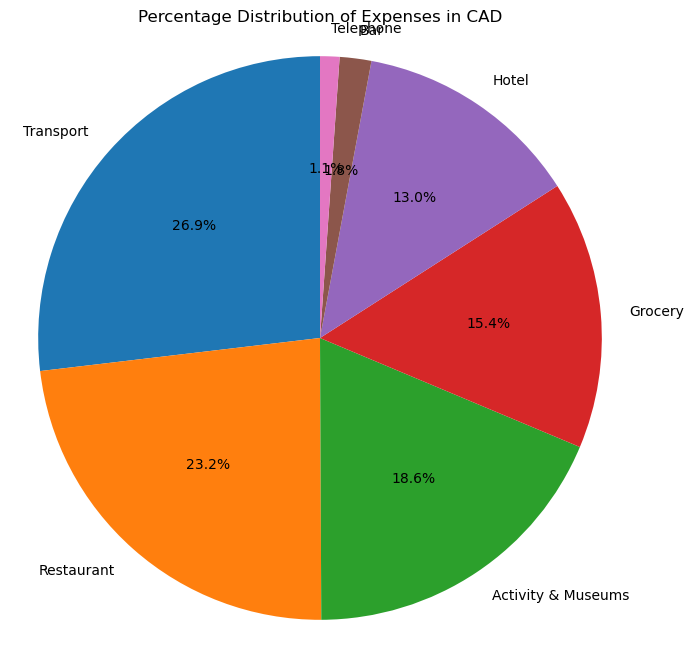

In [89]:
#Total sum 
total_cad = df4['in CAD'].sum()

#Percentage of each type of expense
df4['Percentage'] = (df4['in CAD'] / total_cad) * 100

# Display the dataframe with percentages
display(df4)

#Pie chart to visualize the percentages
plt.figure(figsize=(8, 8))
plt.pie(df4['Percentage'], labels=df4.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Expenses in CAD')
plt.axis('equal')  #Equal aspect ratio ensures the pie chart is a circle.
plt.show()